import library yang akan di gunakan

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Menampilkan data pada dataset yang digunakan

In [146]:
df = pd.read_csv('dataset-of-00s.csv')
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


Mencari nilai null

In [148]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

Mencari nilai duplikat

In [149]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Length: 5872, dtype: bool

Membuat variabel yang dimana isinya pada variabel x adalah Fitur dan y adalah target dari datasetnya

In [150]:
x = df.iloc[:, 3:18]
y = df['target'] 

Menghapus kolom duration_mms karna nilainya terlalu tinggi

In [151]:
x.drop(columns=['duration_ms'], inplace=True)

In [152]:
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections
0,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,4,30.88059,13
1,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,4,41.51106,10
2,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,4,65.32887,13
3,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,4,58.59528,9
4,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,4,22.62384,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,4,40.87045,10
5868,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,4,81.77735,7
5869,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,4,37.51903,11
5870,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,4,39.84092,11


**Proses Data Split**

Memisahkan dataset menjadi 2 (data latihan dan data uji)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Melihat isi dari x_train, x_test, y_train, y_test

In [154]:
print(f'Panjang x train : {len(X_train)}')
print(f'Panjang x test : {len(X_test)}')
print(f'Panjang y train : {len(y_train)}')
print(f'Panjang y test : {len(y_test)}')

Panjang x train : 4697
Panjang x test : 1175
Panjang y train : 4697
Panjang y test : 1175


Membuat Arsitektur Model

In [155]:
model = Sequential()

model.add(Dense(units=14, input_shape=[14], activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Compile Model

In [156]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Melatih Model

In [157]:
train = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


118/118 [==============================] - 1s 4ms/step - loss: 1.6413 - accuracy: 0.5233 - val_loss: 0.9499 - val_accuracy: 0.5309
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.6085 - val_loss: 0.6253 - val_accuracy: 0.6372
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.6902 - val_loss: 0.5821 - val_accuracy: 0.6872
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7245 - val_loss: 0.5966 - val_accuracy: 0.6723
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7304 - val_loss: 0.5326 - val_accuracy: 0.7064
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7344 - val_loss: 0.5229 - val_accuracy: 0.7319
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7373 - val_loss: 0.5163 - val_accuracy: 0.7255
Epoch 8/100

Evaluasi Model

In [158]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)


37/37 [==============================] - 0s 2ms/step


In [159]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.47836879725929593


hasil  menunjukkan bahwa model mampu menjelaskan sekitar 48.47% dari variasi dalam data. Dengan kata lain, hampir setengah dari variasi dalam data dapat dijelaskan oleh model

Grafik

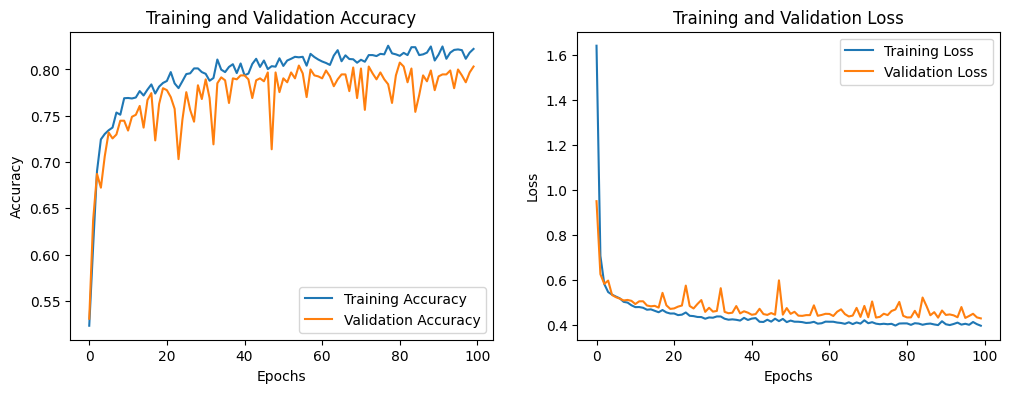

In [160]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()
